In [1]:
!pip install numpy pandas tensorflow keras opencv-python matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2

# Load dataset
dataset_path = "C:/Users/tharindu.p/Downloads/fer2013.csv"  # Make sure you have downloaded the dataset
df = pd.read_csv(dataset_path)

# Display first few rows
df.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
# Mapping emotion labels to categories
emotion_mapping = {
    0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
    4: 'Sad', 5: 'Surprise', 6: 'Neutral'
}

# Convert pixel values from strings to arrays
def process_pixels(pixels):
    pixels = np.array(pixels.split(), dtype='float32')
    return pixels.reshape(48, 48, 1) / 255.0  # Normalize

# Apply preprocessing
df['pixels'] = df['pixels'].apply(process_pixels)

# Convert labels to categorical (one-hot encoding)
X = np.array(df['pixels'].tolist())
y = to_categorical(df['emotion'], num_classes=7)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (28709, 48, 48, 1)
Testing data shape: (7178, 48, 48, 1)


In [4]:
from tensorflow.keras.layers import Input

# Build the CNN model
model = Sequential([
    Input(shape=(48, 48, 1)),  # Explicit input shape
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion categories
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,470,919 (9.43 MB)

 Trainable params: 2,470,919 (9.43 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 51s 112ms/step - accuracy: 0.2571 - loss: 1.7951 - val_accuracy: 0.4262 - val_loss: 1.4780
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 49s 108ms/step - accuracy: 0.4428 - loss: 1.4512 - val_accuracy: 0.4978 - val_loss: 1.3526
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 49s 109ms/step - accuracy: 0.5022 - loss: 1.2962 - val_accuracy: 0.5411 - val_loss: 1.2251
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.5467 - loss: 1.1864 - val_accuracy: 0.5613 - val_loss: 1.1825
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.5726 - loss: 1.1217 - val_accuracy: 0.5673 - val_loss: 1.1551


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5679 - loss: 1.1498
Test Accuracy: 0.5672889351844788


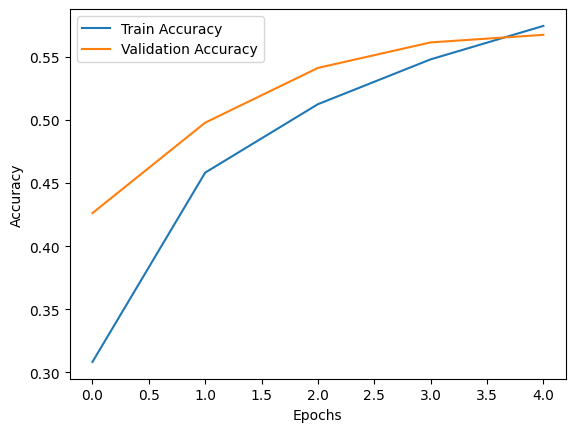

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
